<a href="https://colab.research.google.com/github/suafle/minitarea4/blob/master/minitarea4_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CD2201: Ciencia de Datos en Astronomía**
**Profesores**: Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala




**Minitarea 4**: Uso de scikit-learn

**Objetivos:**

1.   Poner en práctica el uso de todas las librerías de python anteriormente vistas.
2.   Utilizar el paquete scikit-learn para regresión y clasificación.
3.   Medir el desempeño de los algoritmos a utilizar.

**Instrucciones:**

1.   Leer cuidadosamente lo que sigue.
2.   


##**1. Cargar datos**

Para esta minitarea trabajaremos con datos fotométricos de galaxias y estrellas. Esta tarea cuenta con dos objetivos: aplicar algoritmos de machine learning tanto en regresión como en clasificación, como evaluar el desempeño de los algoritmos a utilizar.

Comencemos por cargar los datos que han sido provistos a través de material docente (**datos_ml.csv**), el archivo debería estar en su Google Drive personal. Debemos montar nuestro Google Drive primero para luego acceder a los archivos en él. El archivo se puede abrir utilizando la función **read_csv** del paquete **pandas**.


Este archivo contiene solo fotometría en la banda r:


*   psfMag_r = Magnitud de la PSF
*   fiberMag_r = Magnitud en un radio de fibra de 3 segundos de arco
*   fiber2Mag_r = Magnitud en un radio de fibra de 3 segundos de arco
*   petroMag_r = Magnitud petrosiana (considerando un radio especial llamado radio petrosiano)
*   deVMag_r = Magnitud de Vaucouleurs (Se ajusta una función de De Vaucouvelurs y se calcula la magnitud suponiendo que el objeto obedece esta ley) https://en.wikipedia.org/wiki/De_Vaucouleurs%27_law
*   expMag_r = Magnitud asumiendo un ajuste exponencial
*   modelMag_u	= deVMag_r o expMag_r, dependiendo de cual de las dos resulta mejor ajustadas.
*   cModelMag_r	= magnitud creada a partir de deVMag_r y expMag_r







In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
datos = pd.read_csv('/content/drive/My Drive/datos_ml.csv')

In [4]:
datos

,Unnamed: 0,psfMag_r,fiberMag_r,fiber2Mag_r,petroMag_r,deVMag_r,expMag_r,modelMag_r,cModelMag_r,class
0,0,20.44020,20.78680,21.41974,19.63153,19.44181,19.65987,19.44181,19.49099,b'GALAXY'
1,1,20.59600,21.05023,21.52178,20.43809,20.55688,20.56577,20.55688,20.55688,b'STAR'
2,2,21.20326,21.68447,22.09465,21.44075,21.21554,21.21564,21.21554,21.21554,b'STAR'
3,3,21.11595,21.52400,22.05365,20.81025,20.74396,20.82218,20.74391,20.74396,b'GALAXY'
4,4,21.80693,22.16929,22.75302,20.35699,20.21300,20.49648,20.21300,20.21300,b'GALAXY'
...,...,...,...,...,...,...,...,...,...,...
99995,99995,19.40304,19.73992,20.21592,19.46891,19.41325,19.41312,19.41312,19.41312,b'STAR'
99996,99996,15.89951,16.22320,16.70072,15.95597,15.90502,15.90497,15.90502,15.90502,b'STAR'
99997,99997,18.95202,19.27494,19.75539,19.00164,18.95163,18.95174,18.95164,18.95163,b'STAR'
99998,99998,19.62088,19.25105,19.98588,17.62660,17.14137,17.67299,17.67299,17.57948,b'GALAXY'


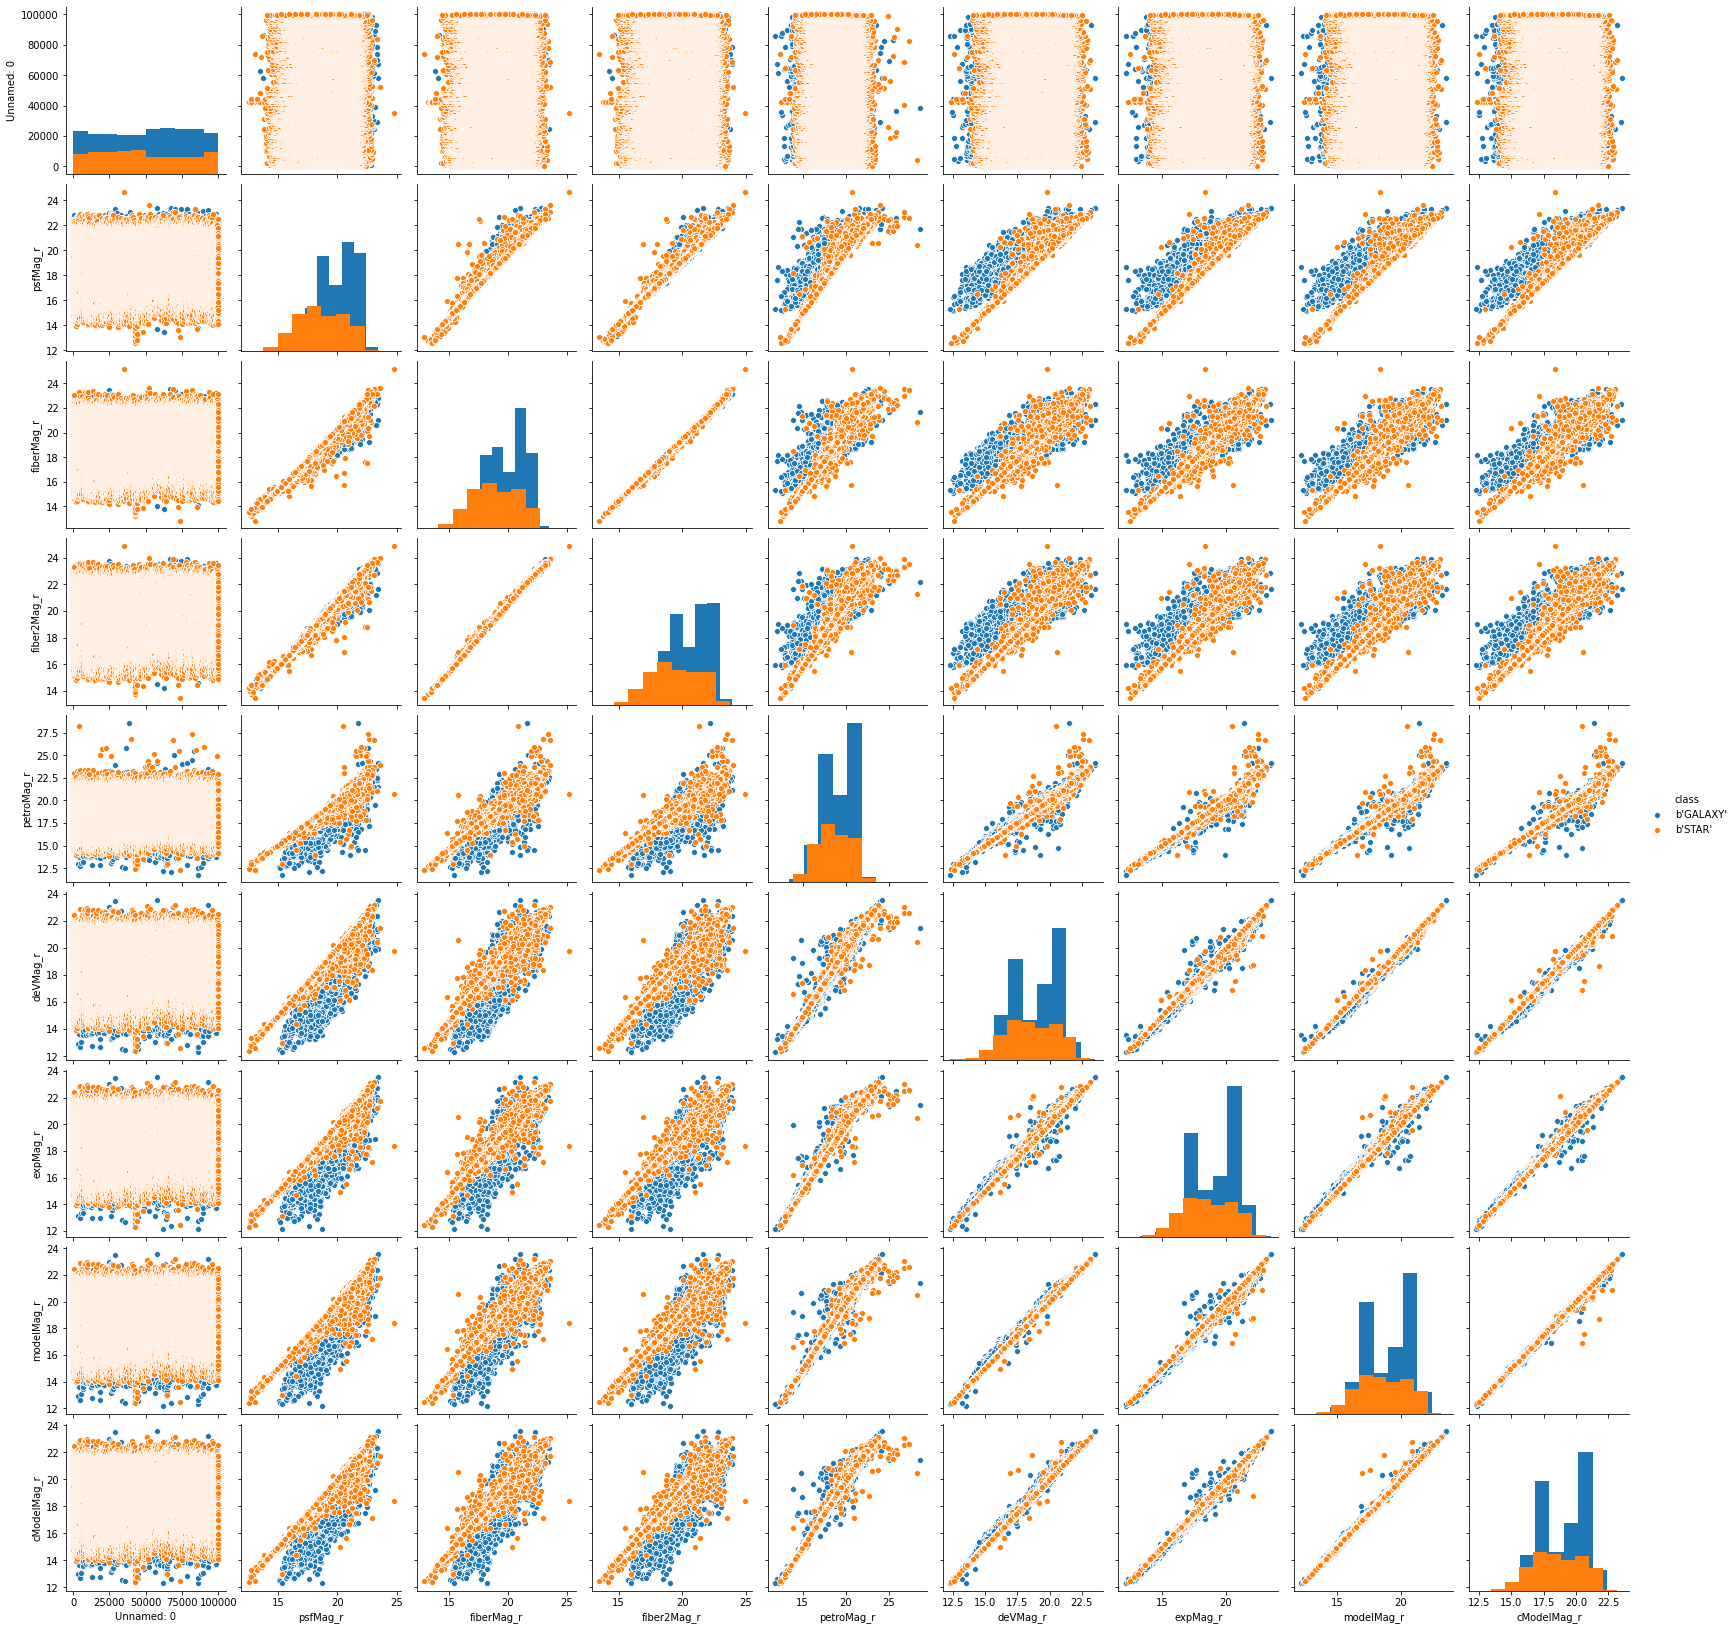

In [5]:
sns.pairplot(datos, hue = 'class', diag_kind = 'hist')

In [7]:
!pip install --quiet astroquery

     |████████████████████████████████| 6.5MB 2.5MB/s 
     |████████████████████████████████| 2.6MB 35.6MB/s 


In [8]:
from astroquery.sdss import SDSS

In [39]:
data = SDSS.query_sql("""SELECT TOP 20000
                      p.psfMag_u, p.psfMag_g, p.psfMag_r, p.psfMag_i, p.psfMag_z, s.class
                      
                      FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
                      
                      WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND s.class != 'STAR'
                      
                      """)

/usr/local/lib/python3.6/dist-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [40]:
df = data.to_pandas()

In [41]:
df

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,class
0,24.90880,22.47447,20.84498,19.95551,19.35879,b'GALAXY'
1,23.89779,23.05503,21.35784,20.34692,19.79562,b'GALAXY'
2,23.67786,23.64438,21.70617,20.54866,19.86075,b'GALAXY'
3,20.78149,18.76061,17.79862,17.34824,17.00585,b'GALAXY'
4,23.81946,23.76193,21.50151,20.28615,19.76123,b'GALAXY'
...,...,...,...,...,...,...
19995,20.33108,18.90646,18.36892,18.18372,18.10291,b'GALAXY'
19996,20.01451,19.40747,18.89007,18.47311,18.46304,b'QSO'
19997,20.02393,19.06617,18.54597,18.29368,18.09109,b'GALAXY'
19998,23.02720,21.70117,19.91067,19.38935,18.95976,b'GALAXY'


In [42]:
df = df.rename(columns={"psfMag_u": "u", "psfMag_g": "g", "psfMag_r": "r", "psfMag_i": "i", "psfMag_z": "z"})

In [43]:
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

In [44]:
df2 = df[['u-g','g-r','r-i','i-z','class']]

In [55]:
dfa = df2[df['class']==b'GALAXY']
dfb = df2[df['class']==b'QSO']

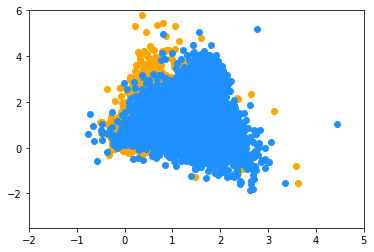

In [57]:
plt.scatter(dfb['g-r'],dfb['u-g'],color='orange')
plt.scatter(dfa['g-r'],dfa['u-g'],color='dodgerblue')
plt.xlim([-2,5])
plt.ylim([-3.5,6])
plt.show()
plt.close()

In [58]:
print(df2['u-g'].min())
print(df2['g-r'].min())
print(df2['r-i'].min())
print(df2['i-z'].min())

print(df2['u-g'].max())
print(df2['g-r'].max())
print(df2['r-i'].max())
print(df2['i-z'].max())

-10019.08981
-10019.35429
-1.4882899999999992
-4.2318999999999996
5.814410000000002
5.787420000000001
2.7574299999999994
10018.31602


In [46]:
print(np.where(df2['u-g'] == df2['g-r'].min()))
print(np.where(df2['g-r'] == df2['g-r'].min()))
print(np.where(df2['g-r'] == df2['g-r'].min()))
print(np.where(df2['g-r'] == df2['g-r'].min()))
print(np.where(df2['r-i'] == df2['r-i'].max()))
print(np.where(df2['i-z'] == df2['i-z'].max()))

(array([7465]),)
(array([9905]),)
(array([524]),)


In [47]:
print(df2.iloc[14307])
print(df2.iloc[929])
print(df2.iloc[2754])

u-g         2.8295
g-r         1.6511
r-i        1.04411
i-z        0.42176
class    b'GALAXY'
Name: 14307, dtype: object
u-g        1.91707
g-r        1.17856
r-i        1.03837
i-z        0.36422
class    b'GALAXY'
Name: 929, dtype: object
u-g        1.74697
g-r        1.73657
r-i          0.689
i-z        0.51972
class    b'GALAXY'
Name: 2754, dtype: object


In [48]:
df3 = df2.drop([929,2754,14307])

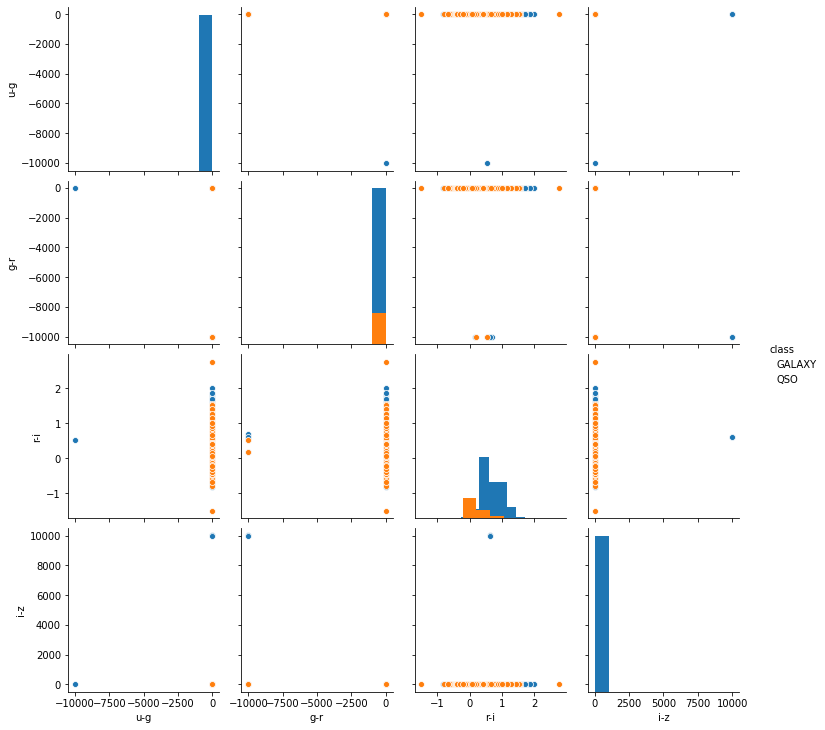

In [49]:
sns.pairplot(df3, hue = 'class', diag_kind = 'hist')

In [59]:
!pip install --quiet AstroML

     |████████████████████████████████| 112kB 2.8MB/s 


In [92]:
from astroML.datasets import fetch_sdss_galaxy_colors


In [93]:
data = fetch_sdss_galaxy_colors()


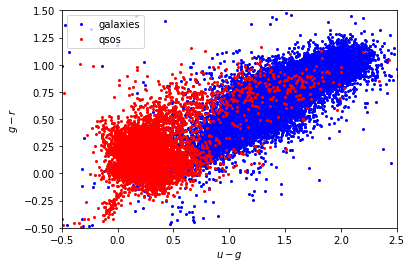

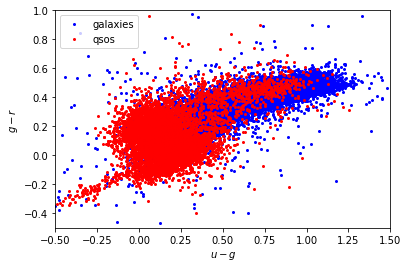

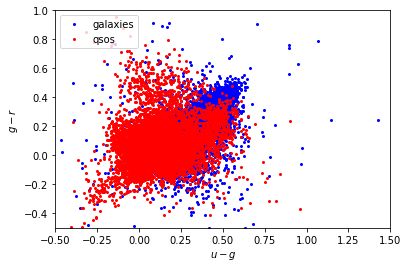

In [99]:
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
iz = data['i'] - data['z']
spec_class = data['specClass']

galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

#------------------------------------------------------------
# Prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)
ax.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos')
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
plt.show()
plt.close()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1)
ax.plot(gr[galaxies], ri[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(gr[qsos], ri[qsos], '.', ms=4, c='r', label='qsos')
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
plt.show()
plt.close()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1)
ax.plot(ri[galaxies], iz[galaxies], '.', ms=4, c='b', label='galaxies')
ax.plot(ri[qsos], iz[qsos], '.', ms=4, c='r', label='qsos')
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
plt.show()
plt.close()

In [80]:
u = []
g = []
r = []
i = []
z = []
clase = []

In [81]:
for tup in data:
  u.append(tup[0])
  g.append(tup[1])
  r.append(tup[2])
  i.append(tup[3])
  z.append(tup[4])
  clase.append(tup[5])

In [121]:
dic = {'u':u,'g':g,'r':r,'i':i,'z':z,'class':clase}

In [122]:
df = pd.DataFrame(dic)

In [123]:
df = df[df['r']<20]
df = df[df['i']<20]
df = df[df['z']<20]

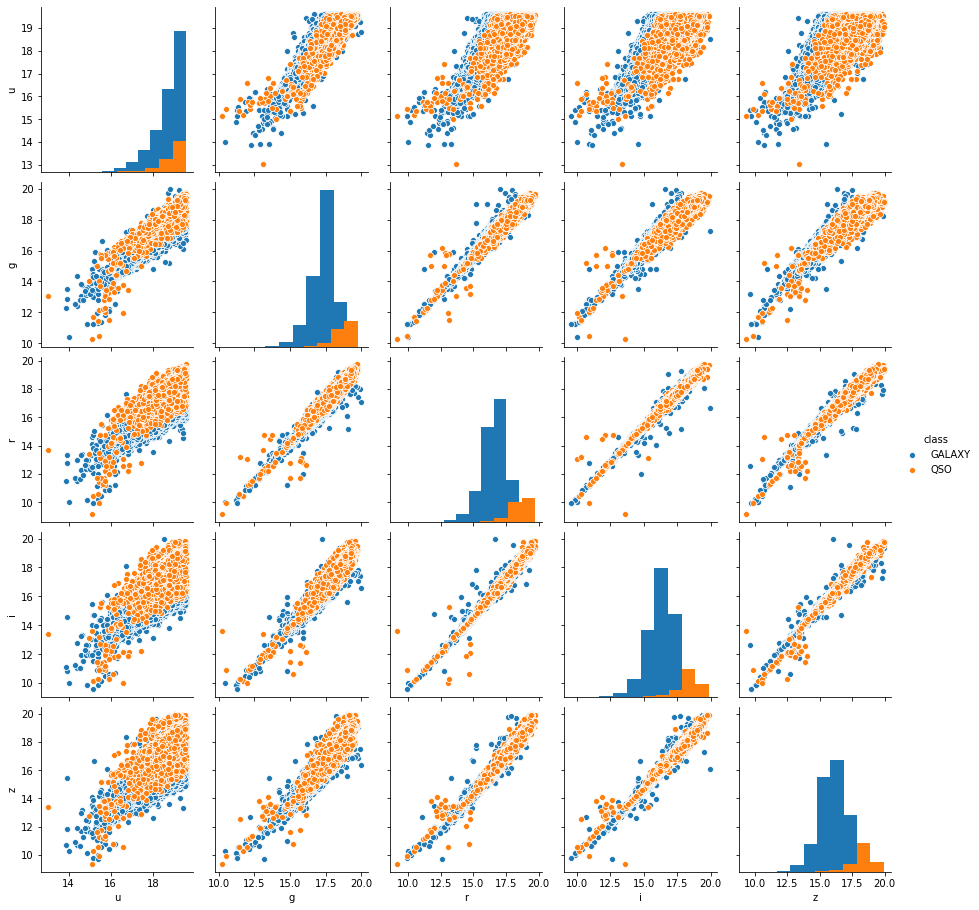

In [124]:
sns.pairplot(df, hue = 'class', diag_kind = 'hist')

In [125]:
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

In [126]:
df2 = df[['u-g','g-r','r-i','i-z','class']]

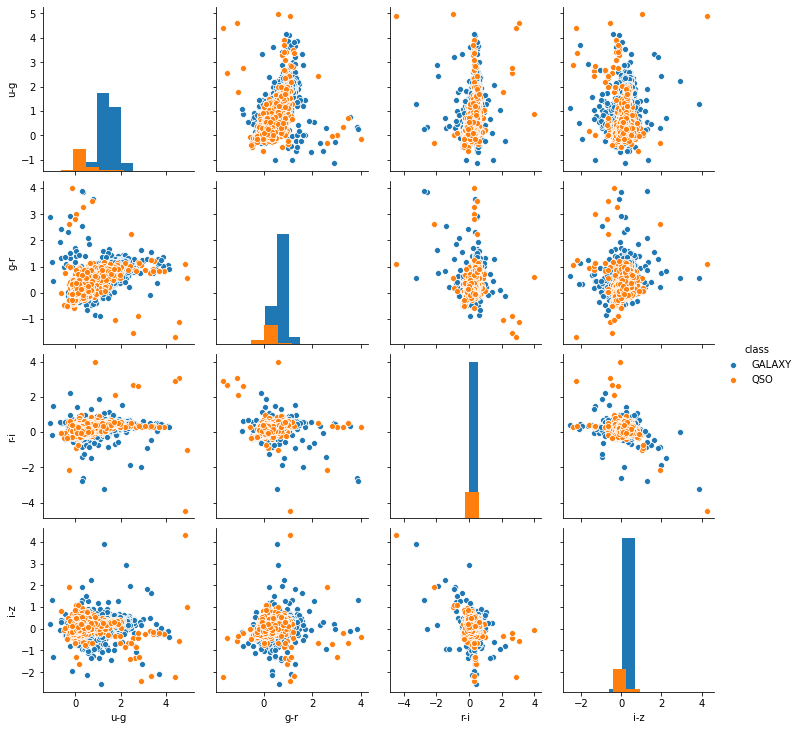

In [127]:
sns.pairplot(df2, hue = 'class', diag_kind = 'hist')

In [132]:
df2['class']

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4           QSO
          ...  
49995    GALAXY
49996    GALAXY
49997    GALAXY
49998    GALAXY
49999       QSO
Name: class, Length: 49917, dtype: object

In [133]:
dfa = df2[df2['class']=='GALAXY']
dfb = df2[df2['class']=='QSO']

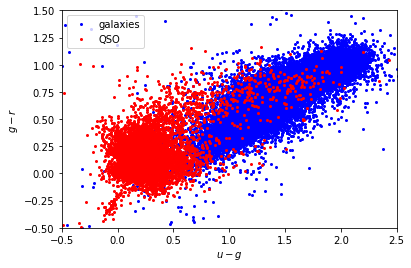

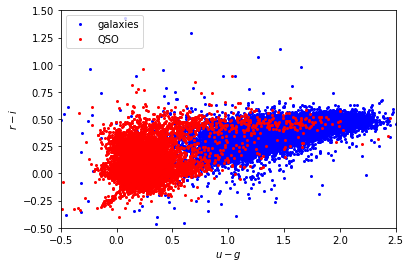

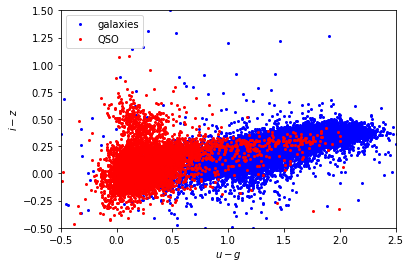

In [138]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)
ax.plot(dfa['u-g'], dfa['g-r'], '.', ms=4, c='b', label='galaxies')
ax.plot(dfb['u-g'], dfb['g-r'], '.', ms=4, c='r', label='QSO')
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
plt.show()
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)
ax.plot(dfa['u-g'], dfa['r-i'], '.', ms=4, c='b', label='galaxies')
ax.plot(dfb['u-g'], dfb['r-i'], '.', ms=4, c='r', label='QSO')
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$r-i$')
plt.show()
plt.close()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)
ax.plot(dfa['u-g'], dfa['i-z'], '.', ms=4, c='b', label='galaxies')
ax.plot(dfb['u-g'], dfb['i-z'], '.', ms=4, c='r', label='QSO')
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$i-z$')
plt.show()
plt.close()